In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020 (1).csv to asriosgu_fetal2020 (1).csv


In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)


<ipython-input-4-1b4023b27b55>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


**Procedimiento 1:**

Usando la función de train_test_split de sklearn, establecer el conjunto de datos de entrenamiento y de validación tomando como tamaño para el entrenamiento del 70% de los datos. Las variables explicativas corresponden a: "SEXO", "P_PMAN_IRIS" (principal causa de muerte) y "T_GES" (tiempo de gestación). La variable respuesta corresponde a: "PESO_NAC".

In [ ]:

df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)
#poner SegÚn la clasificacion del Dane para valores deconocidos

<ipython-input-5-b5b4dedce8c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [ ]:
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)
df.loc[(df.P_PMAN_IRIS == "6"), 'P_PMAN_IRIS'] = "6"
df.head(2)


<ipython-input-7-a0b73d84310a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,9,1
11,3,0.0,1,1


In [ ]:
df["P_PMAN_IRIS"].value_counts()
df["PESO_NAC"].value_counts()
df["T_GES"].value_counts()



1    23723
9     3127
3     2859
2     2646
4      949
5       23
Name: T_GES, dtype: int64

lugo, se deben transformar las variables cualitativas en variables Dummie esto para un mejor análisis

In [ ]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3) # porcentaje de validacion el restante es de entrenamiento
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
5,2,6.0,1
70,3,0.0,9
52,3,6.0,1
76,3,6.0,1
47,3,6.0,1
...,...,...,...
68,3,6.0,1
52,3,6.0,1
11,1,6.0,1


In [ ]:
df["PESO_NAC"] = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "1.5-2 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.3 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.4 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = ">4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "deconosido Kg"
print(df)


          SEXO P_PMAN_IRIS       PESO_NAC  T_GES
COD_DPTO                                        
70           3         6.0  deconosido Kg      1
11           3         0.0         < 1 Kg      1
11           1         0.0         < 1 Kg      2
11           3         6.0         < 1 Kg      1
11           2         6.0       1.5-2 Kg      3
...        ...         ...            ...    ...
41           3         6.0         < 1 Kg      1
11           3         6.0  deconosido Kg      1
11           3         0.0  deconosido Kg      1
76           3         6.0         < 1 Kg      1
11           3         0.0         < 1 Kg      1

[33327 rows x 4 columns]


<ipython-input-10-437bf6668935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PESO_NAC"] = df.PESO_NAC.astype(str)


In [ ]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,deconosido Kg,1
11,3,0.0,< 1 Kg,1
11,1,0.0,< 1 Kg,2
11,3,6.0,< 1 Kg,1


In [ ]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

<ipython-input-12-8a7cd2abb3a3>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)


,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1


Procedimiento 2

In [ ]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
76,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(13,13,13,13,13,13,13,13,13),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(13,13,13,13,13,13,13,13,13),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY) # capas ocultas ...

MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13, 13, 13, 13),
              max_iter=500)

In [ ]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.75
Exactitud: 0.75


**Procedimiento 3**

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)


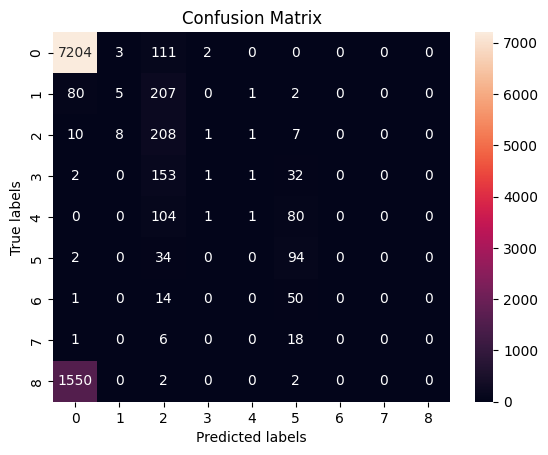

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

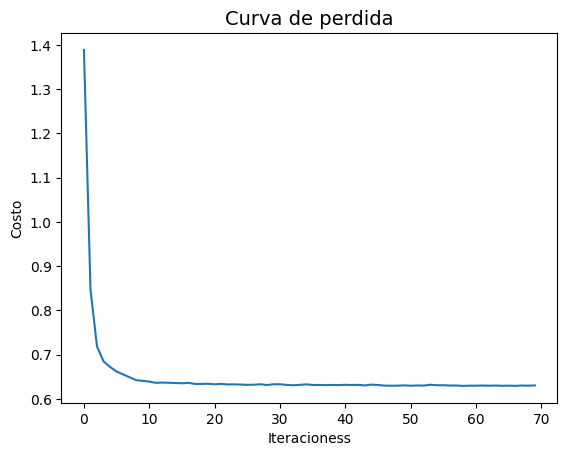

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

**Procedimiento 4**

In [ ]:
train1.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
76,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_obs = np.array([[1, 1, 0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
no_obs1 = np.array([[0, 4, 0]])
mlp_clf.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
no_obs2 = np.array([[1, 1, 1]])
mlp_clf.predict(no_obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
no_obs3 = np.array([[1, 0, 1]])
mlp_clf.predict(no_obs3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
no_obs4 = np.array([[3, 0, 0]])
mlp_clf.predict(no_obs4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.PESO_NAC.unique() # Mostrar los valores únicos de la variable objetivo 'PESO_NAC' en el conjunto de datos original


array(['deconosido Kg', '< 1 Kg', '1.5-2 Kg', '3-3.5 Kg', '1-1.5 Kg',
       '2-2.5 Kg', '2-2.3 Kg', '3-3.4 Kg', '>4 Kg'], dtype=object)

**Procedimiento 5**

In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')
mlp_clf2.fit(trainX, trainY) # capas ocultas ...

MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                                  13, 13, 13, 13, 13, 13, 13),
              max_iter=500)

In [ ]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(testX))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred2)))

Exactitud: 0.75


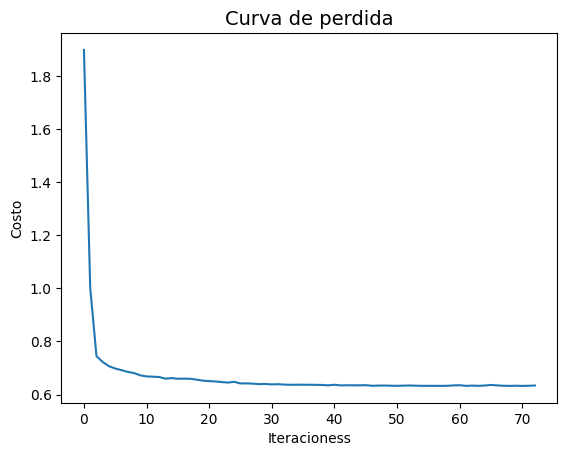

In [ ]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()